In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll
from adjustText import adjust_text
import pandas as pd
import numpy as np
import os


Bad key "text.kerning_factor" on line 4 in
/Users/junaluzi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
font = {'size'   : 14}
matplotlib.rc('font', **font)
sns.set_style('darkgrid')

## WID Data

In [3]:
inc_data = pd.read_csv('./inequality_data/wid/WID_income.csv', delimiter=';')
inc_data = inc_data.reset_index()

### Income

In [4]:
# Clean data
inc_data.columns = inc_data.iloc[0]
inc_data = inc_data.iloc[1:]
inc_data.head()

0 Percentile  Year  \
1    p90p100  1871   
2    p90p100  1872   
3    p90p100  1873   
4    p90p100  1874   
5    p90p100  1875   

0 sptinc_z_CH\nPre-tax national income \nTop 10% | share\nSwitzerland  \
1                                                NaN                    
2                                                NaN                    
3                                                NaN                    
4                                                NaN                    
5                                                NaN                    

0 sptinc_z_UY\nPre-tax national income \nTop 10% | share\nUruguay  \
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                
5                                                NaN                

0 sptinc_z_SY\nPre-tax national income \nTop 10% | share\nSyrian Arab Republic  \
1                                                NaN                             
2                                                NaN                             
3                                                NaN                             
4                                                NaN                             
5                                                NaN                             

0 sptinc_z_GN\nPre-tax national income \nTop 10% | share\nGuinea  \
1                                                NaN               
2                                                NaN               
3                                                NaN               
4                                                NaN               
5                                                NaN               

0 sptinc_z_MW\nPre-tax national income \nTop 10% | share\nMalawi  \
1                                                NaN               
2                                                NaN               
3                                                NaN               
4                                                NaN               
5                                                NaN               

0 sptinc_z_SK\nPre-tax national income \nTop 10% | share\nSlovakia  \
1                                                NaN                 
2                                                NaN                 
3                                                NaN                 
4                                                NaN                 
5                                                NaN                 

0 sptinc_z_ZM\nPre-tax national income \nTop 10% | share\nZambia  \
1                                                NaN               
2                                                NaN               
3                                                NaN               
4                                                NaN               
5                                                NaN               

0 sptinc_z_ER\nPre-tax national income \nTop 10% | share\nEritrea  ...  \
1                                                NaN               ...   
2                                                NaN               ...   
3                                                NaN               ...   
4                                                NaN               ...   
5                                                NaN               ...   

0 sptinc_z_CG\nPre-tax national income \nTop 10% | share\nCongo  \
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                NaN              
5                                                NaN              

0 sptinc_z_BE\nPre-tax n

In [5]:
cols = [x for x in inc_data.columns if 'sptinc' in x]
inc_data = pd.melt(inc_data, id_vars=['Percentile','Year'], value_vars=cols, value_name='values')
inc_data.columns = ['percentile', 'year', 'variable', 'values']

In [6]:
inc_data['country'] = inc_data.variable.apply(lambda x: x.split('\n')[-1])
inc_data['variable'] = inc_data.variable.apply(lambda x: x.split('\n')[1])
inc_data['values'] = inc_data['values'].apply(lambda x: float(x))
inc_data['year'] = inc_data['year'].apply(lambda x: int(x))
inc_data = inc_data[(inc_data['country'] != 'null')] # unknown name in the database

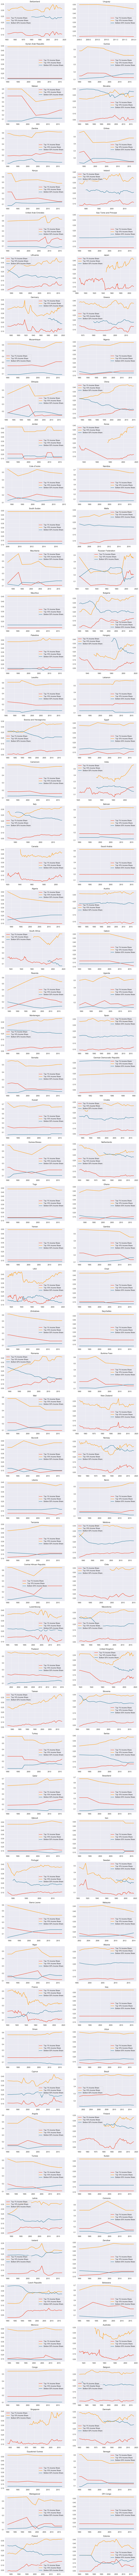

In [7]:
top10, mdl40, btm50, top1 = 'p90p100', 'p50p90', 'p0p50', 'p99p100'

inc_grouped_data = inc_data[(inc_data.percentile == top1) | (inc_data.percentile == top10) \
                            | (inc_data.percentile == mdl40) | (inc_data.percentile == btm50)]

countries = inc_grouped_data.country.unique()

if len(countries)%2 == 0:
    subplotx = len(countries)//2
else:
    subplotx = len(countries)//2+1

fig, axes = plt.subplots(subplotx, 2, figsize=(20, 400))
for i, ax in zip(range(len(countries)), axes.flat):
    country = countries[i]
    d1 = inc_grouped_data[((inc_grouped_data.country == country) & (inc_grouped_data.percentile == top1))].dropna()
    d2 = inc_grouped_data[((inc_grouped_data.country == country) & (inc_grouped_data.percentile == top10))].dropna()
    d4 = inc_grouped_data[((inc_grouped_data.country == country) & (inc_grouped_data.percentile == btm50))].dropna()
    ax.plot(d1.year, d1['values'], color = '#f1593f', label='Top 1% Income Share', linewidth=3)
    ax.plot(d2.year, d2['values'], color = '#ffa729', label='Top 10% Income Share', linewidth=3)
    ax.plot(d4.year, d4['values'], color = '#498ca7', label='Bottom 50% Income Share', linewidth=3)
    ax.set_title(country)
    ax.legend()

In [8]:
inc_top1 = inc_grouped_data[(inc_grouped_data.percentile == top1)].pivot(index='country', \
                columns='year', values='values')
inc_top10 = inc_grouped_data[(inc_grouped_data.percentile == top10)].pivot(index='country', \
                columns='year', values='values')
inc_mdl40 = inc_grouped_data[(inc_grouped_data.percentile == mdl40)].pivot(index='country', \
                columns='year', values='values')
inc_btm50 = inc_grouped_data[(inc_grouped_data.percentile == btm50)].pivot(index='country', \
                columns='year', values='values')

In [9]:
y1, y2 = 1990, 2015
# Income top 10
inc_top10 = inc_top10.sort_values(by=y1)
inc_top10['diff'] = inc_top10[y2] - inc_top10[y1]
inc_top10 = inc_top10[inc_top10['diff'].notna()].reset_index()
# Income btm 50
inc_btm50['diff'] = inc_btm50[y2] - inc_btm50[y1]
inc_btm50 = inc_btm50[inc_btm50['diff'].notna()].reset_index()

In [10]:
# Reindex inc_btm50 using column in inc_top10
inc_btm50 = inc_btm50.set_index('country')
inc_btm50 = inc_btm50.reindex(index=inc_top10['country'])
inc_btm50 = inc_btm50.reset_index()

In [11]:
# Income top 10
lines, colors, inc_incr, inc_dec = [], [], [], []
for i in range(len(inc_top10.country)):
    pair = [(i, inc_top10[y1][i]), (i, inc_top10[y2][i])]
    if inc_top10['diff'][i] < 0:
        colors.append('#ffa729')
        inc_incr.append(np.nan)
        inc_dec.append(inc_top10[y2][i])
    else:
        colors.append('#06396b')
        inc_incr.append(inc_top10[y2][i])
        inc_dec.append(np.nan)
    lines.append(pair)

lineColl = matcoll.LineCollection(lines, colors=colors)

# Income bmt 50
btmlines, btmcolors, btminc_incr, btminc_dec = [], [], [], []
for i in range(len(inc_btm50.country)):
    pair = [(i, inc_btm50[y1][i]), (i, inc_btm50[y2][i])]
    if inc_btm50['diff'][i] < 0:
        btmcolors.append('#ffa729')
        btminc_incr.append(np.nan)
        btminc_dec.append(inc_btm50[y2][i])
    else:
        btmcolors.append('#06396b')
        btminc_incr.append(inc_btm50[y2][i])
        btminc_dec.append(np.nan)
    btmlines.append(pair)

btmlineColl = matcoll.LineCollection(btmlines, colors=btmcolors)

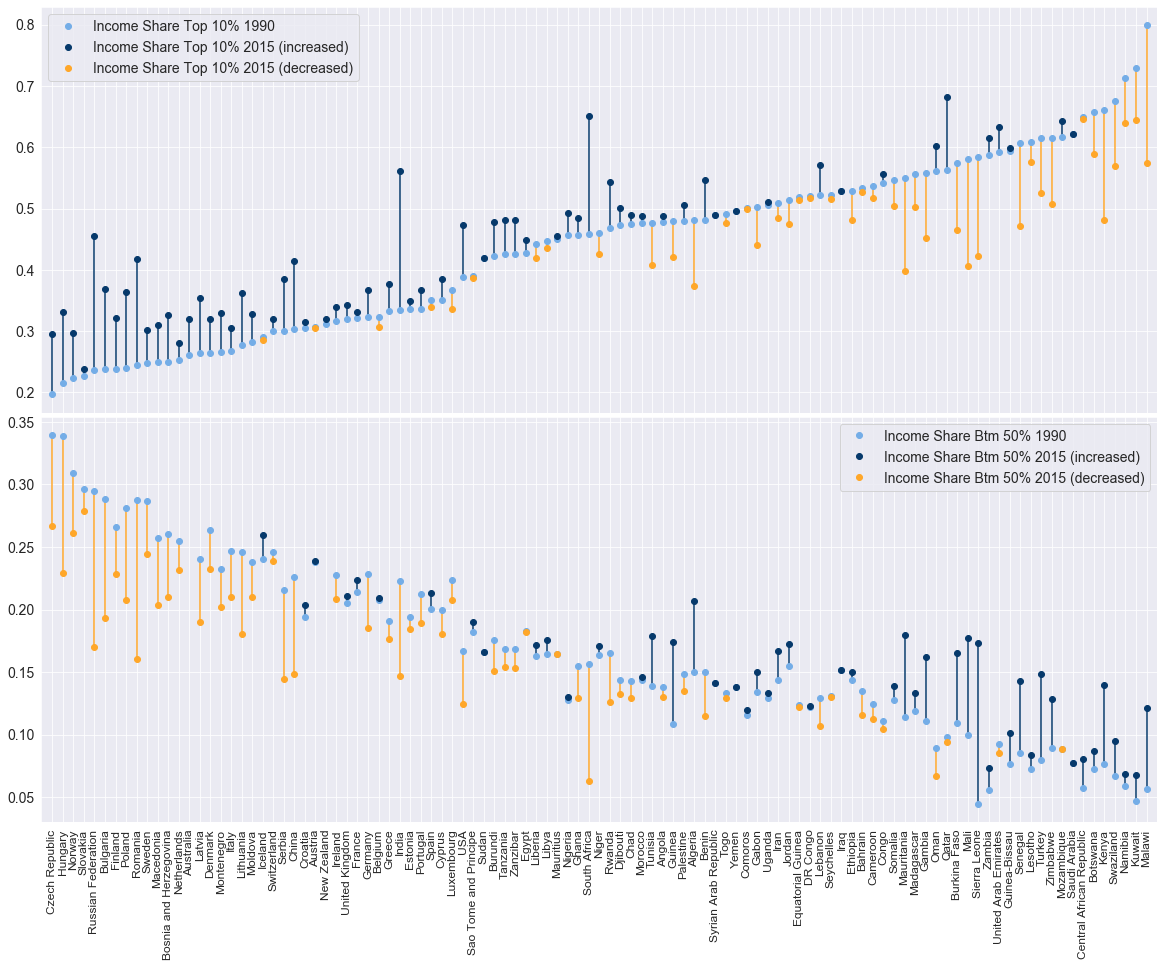

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))
ax1.plot(inc_top10.country, inc_top10[y1], linestyle='None', marker='o',
         color='#74ade7', label='Income Share Top 10% {}'.format(y1))
ax1.plot(inc_top10.country, inc_incr, linestyle='None', marker='o',
          color='#06396b', label='Income Share Top 10% {} (increased)'.format(y2))
ax1.plot(inc_top10.country, inc_dec, linestyle='None', marker='o',
          color='#ffa729', label='Income Share Top 10% {} (decreased)'.format(y2))
ax1.tick_params(axis='x', labelrotation=90, labelsize=12, colors='white')
ax1.margins(x=0.01)
# ax1.xaxis.set_visible(False)

ax2.plot(inc_btm50.country, inc_btm50[y1], linestyle='None', marker='o',
          color='#74ade7', label='Income Share Btm 50% {}'.format(y1))
ax2.plot(inc_btm50.country, btminc_incr, linestyle='None', marker='o',
           color='#06396b', label='Income Share Btm 50% {} (increased)'.format(y2))
ax2.plot(inc_btm50.country, btminc_dec, linestyle='None', marker='o',
           color='#ffa729', label='Income Share Btm 50% {} (decreased)'.format(y2))
ax2.tick_params(axis='x', labelrotation=90, labelsize=12)
ax2.margins(x=0.01)

ax1.add_collection(lineColl)
ax2.add_collection(btmlineColl)
ax1.legend()
ax2.legend()
plt.subplots_adjust(hspace=0.01)

### Wealth

In [13]:
wlth_data = pd.read_csv('./inequality_data/wid/WID_wealth.csv', delimiter=';')
wlth_data = wlth_data.reset_index()

In [14]:
# Clean data
wlth_data.columns = wlth_data.iloc[0]
wlth_data = wlth_data.iloc[1:]
wlth_data.head()

0 Percentile  Year  \
1    p90p100  1871   
2    p90p100  1872   
3    p90p100  1873   
4    p90p100  1874   
5    p90p100  1875   

0 shweal_z_CH\nNet personal wealth\nTop 10% | share\nSwitzerland  \
1                                                NaN               
2                                                NaN               
3                                                NaN               
4                                                NaN               
5                                                NaN               

0 shweal_z_UY\nNet personal wealth\nTop 10% | share\nUruguay  \
1                                                NaN           
2                                                NaN           
3                                                NaN           
4                                                NaN           
5                                                NaN           

0 shweal_z_SY\nNet personal wealth\nTop 10% | share\nSyrian Arab Republic  \
1                                                NaN                        
2                                                NaN                        
3                                                NaN                        
4                                                NaN                        
5                                                NaN                        

0 shweal_z_GN\nNet personal wealth\nTop 10% | share\nGuinea  \
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          
5                                                NaN          

0 shweal_z_MW\nNet personal wealth\nTop 10% | share\nMalawi  \
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          
5                                                NaN          

0 shweal_z_SK\nNet personal wealth\nTop 10% | share\nSlovakia  \
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            
5                                                NaN            

0 shweal_z_ZM\nNet personal wealth\nTop 10% | share\nZambia  \
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          
5                                                NaN          

0 shweal_z_ER\nNet personal wealth\nTop 10% | share\nEritrea  ...  \
1                                                NaN          ...   
2                                                NaN          ...   
3                                                NaN          ...   
4                                                NaN          ...   
5                                                NaN          ...   

0 shweal_z_CG\nNet personal wealth\nTop 10% | share\nCongo  \
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         
5                                                NaN         

0 shweal_z_BE\nNet personal wealth\nTop 10% | share\nBelgium  \
1                                                NaN           
2                                                NaN           
3                                                NaN           
4                                     

In [15]:
cols = [x for x in wlth_data.columns if 'shweal' in x]
wlth_data = pd.melt(wlth_data, id_vars=['Percentile','Year'], value_vars=cols, value_name='values')
wlth_data.columns = ['percentile', 'year', 'variable', 'values']

In [16]:
wlth_data['country'] = wlth_data.variable.apply(lambda x: x.split('\n')[-1])
wlth_data['new_variable'] = wlth_data.variable.apply(lambda x: x.split('\n')[1])
wlth_data['values'] = wlth_data['values'].apply(lambda x: float(x))
wlth_data['year'] = wlth_data['year'].apply(lambda x: int(x))

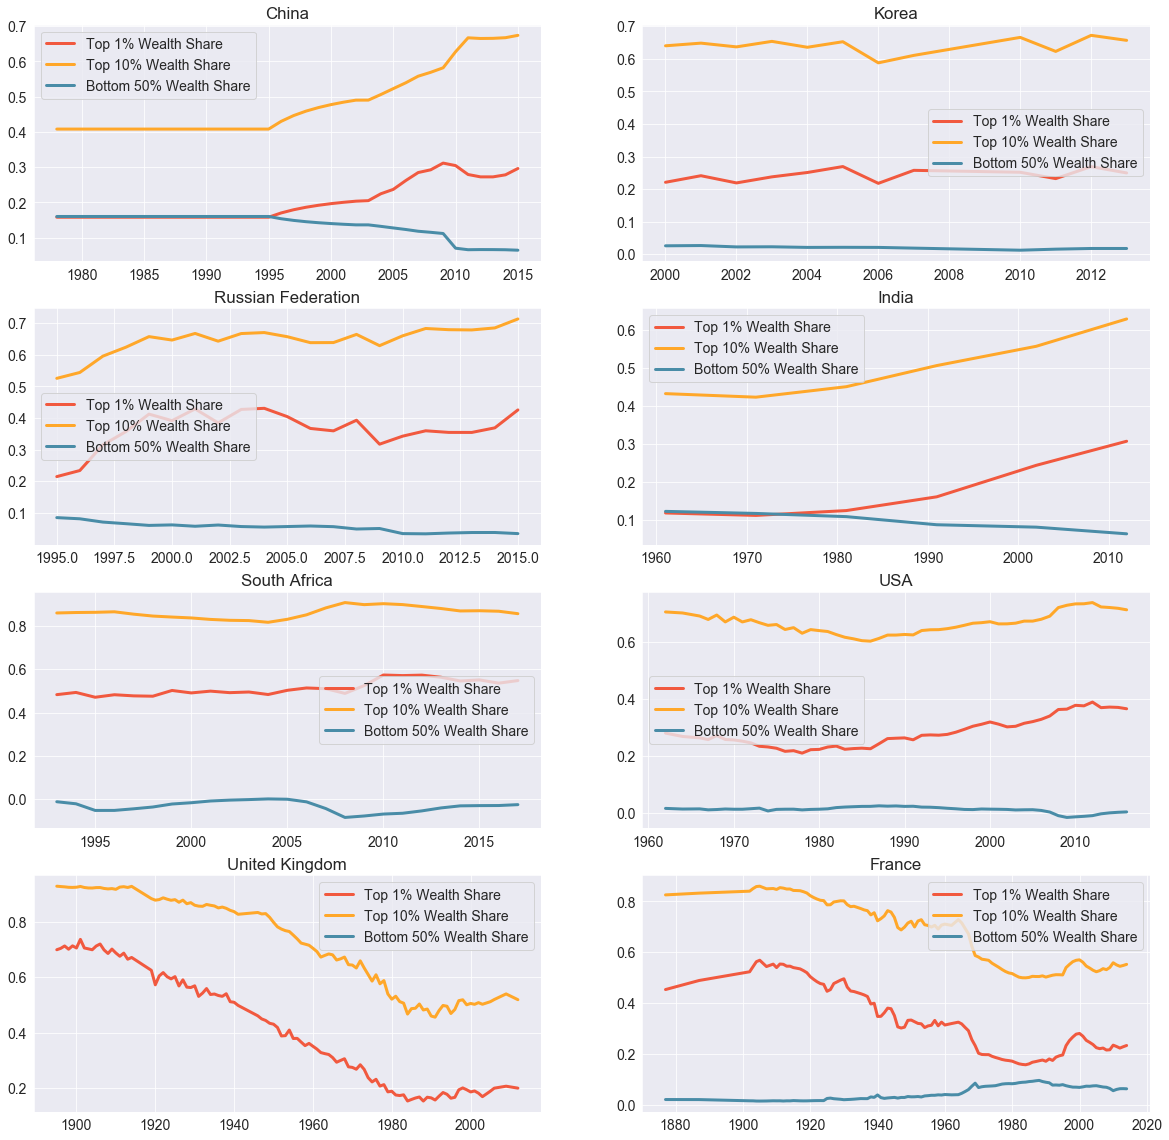

In [17]:
top10, mdl40, btm50, top1 = 'p90p100', 'p50p90', 'p0p50', 'p99p100'

wlth_grouped_data = wlth_data[(wlth_data.percentile == top1) | (wlth_data.percentile == top10) \
                            | (wlth_data.percentile == mdl40) | (wlth_data.percentile == btm50)]

wlth_grouped_data = wlth_grouped_data[(wlth_grouped_data['values'].notna())]
countries = wlth_grouped_data.country.unique()

if len(countries)%2 == 0:
    subplotx = len(countries)//2
else:
    subplotx = len(countries)//2+1

fig, axes = plt.subplots(subplotx, 2, figsize=(20, 20))
for i, ax in zip(range(len(countries)), axes.flat):
    country = countries[i]
    d1 = wlth_grouped_data[((wlth_grouped_data.country == country) & (wlth_grouped_data.percentile == top1))]
    d2 = wlth_grouped_data[((wlth_grouped_data.country == country) & (wlth_grouped_data.percentile == top10))]
    d4 = wlth_grouped_data[((wlth_grouped_data.country == country) & (wlth_grouped_data.percentile == btm50))]
    ax.plot(d1.year, d1['values'], color = '#f1593f', label='Top 1% Wealth Share', linewidth=3)
    ax.plot(d2.year, d2['values'], color = '#ffa729', label='Top 10% Wealth Share', linewidth=3)
    ax.plot(d4.year, d4['values'], color = '#498ca7', label='Bottom 50% Wealth Share', linewidth=3)
    ax.set_title(country)
    ax.legend()

In [18]:
wlth_top1 = wlth_grouped_data[(wlth_grouped_data.percentile == top1)].pivot(index='country', \
                columns='year', values='values')
wlth_top10 = wlth_grouped_data[(wlth_grouped_data.percentile == top10)].pivot(index='country', \
                columns='year', values='values')
wlth_mdl40 = wlth_grouped_data[(wlth_grouped_data.percentile == mdl40)].pivot(index='country', \
                columns='year', values='values')
wlth_btm50 = wlth_grouped_data[(wlth_grouped_data.percentile == btm50)].pivot(index='country', \
                columns='year', values='values')

In [19]:
y1, y2 = 2000, 2010
# Wealth top 10
wlth_top10 = wlth_top10.sort_values(by=y1)
wlth_top10['diff'] = wlth_top10[y2] - wlth_top10[y1]
wlth_top10 = wlth_top10[wlth_top10['diff'].notna()].reset_index()
# Wealth btm 50
wlth_btm50['diff'] = wlth_btm50[y2] - wlth_btm50[y1]
wlth_btm50 = wlth_btm50[wlth_btm50['diff'].notna()].reset_index()

In [20]:
# Reindex inc_btm50 using column in inc_top10
wlth_btm50 = wlth_btm50.set_index('country')
wlth_btm50 = wlth_btm50.reindex(index=wlth_top10['country'])
wlth_btm50 = wlth_btm50.reset_index()

In [21]:
# Wealth top 10
wlth_lines, wlth_colors, wlth_incr, wlth_dec = [], [], [], []
for i in range(len(wlth_top10.country)):
    wlth_pair = [(i, wlth_top10[y1][i]), (i, wlth_top10[y2][i])]
    if wlth_top10['diff'][i] < 0:
        wlth_colors.append('#ffa729')
        wlth_incr.append(np.nan)
        wlth_dec.append(wlth_top10[y2][i])
    else:
        wlth_colors.append('#06396b')
        wlth_incr.append(wlth_top10[y2][i])
        wlth_dec.append(np.nan)
    wlth_lines.append(wlth_pair)

wlth_lineColl = matcoll.LineCollection(wlth_lines, colors=wlth_colors)

# Wealth bmt 50
wlth_btmlines, wlth_btmcolors, btmwlth_incr, btmwlth_dec = [], [], [], []
for i in range(len(wlth_btm50.country)):
    wlth_pair = [(i, wlth_btm50[y1][i]), (i, wlth_btm50[y2][i])]
    if wlth_btm50['diff'][i] < 0:
        wlth_btmcolors.append('#ffa729')
        btmwlth_incr.append(np.nan)
        btmwlth_dec.append(wlth_btm50[y2][i])
    else:
        wlth_btmcolors.append('#06396b')
        btmwlth_incr.append(wlth_btm50[y2][i])
        btmwlth_dec.append(np.nan)
    wlth_btmlines.append(wlth_pair)

wlth_btmlineColl = matcoll.LineCollection(wlth_btmlines, colors=wlth_btmcolors)

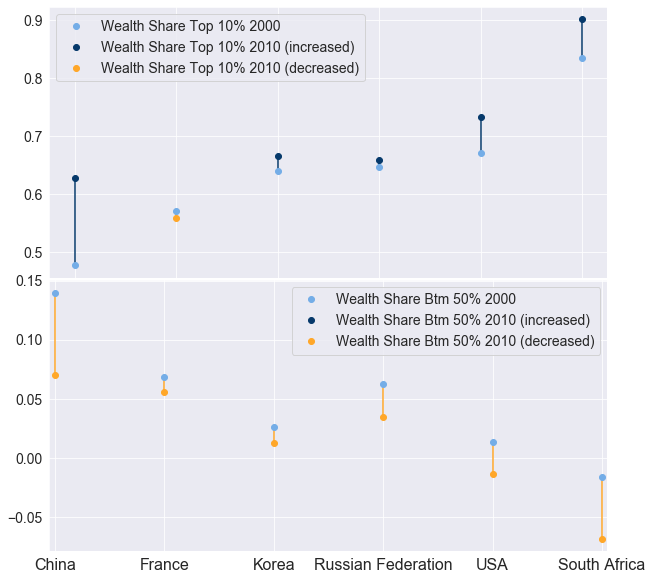

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot(wlth_top10.country, wlth_top10[y1], linestyle='None', marker='o',
         color='#74ade7', label='Wealth Share Top 10% {}'.format(y1))
ax1.plot(wlth_top10.country, wlth_incr, linestyle='None', marker='o',
          color='#06396b', label='Wealth Share Top 10% {} (increased)'.format(y2))
ax1.plot(wlth_top10.country, wlth_dec, linestyle='None', marker='o',
          color='#ffa729', label='Wealth Share Top 10% {} (decreased)'.format(y2))
ax1.tick_params(axis='x', labelrotation=90, labelsize=12, colors='white')
# ax1.margins(x=0.01)

ax2.plot(wlth_btm50.country, wlth_btm50[y1], linestyle='None', marker='o',
          color='#74ade7', label='Wealth Share Btm 50% {}'.format(y1))
ax2.plot(wlth_btm50.country, btmwlth_incr, linestyle='None', marker='o',
           color='#06396b', label='Wealth Share Btm 50% {} (increased)'.format(y2))
ax2.plot(wlth_btm50.country, btmwlth_dec, linestyle='None', marker='o',
           color='#ffa729', label='Wealth Share Btm 50% {} (decreased)'.format(y2))
ax2.tick_params(axis='x', labelsize=16)
ax2.margins(x=0.01)

ax1.add_collection(wlth_lineColl)
ax2.add_collection(wlth_btmlineColl)
ax1.legend()
ax2.legend()
plt.subplots_adjust(hspace=0.01)

## OECD

In [23]:
data = pd.read_csv('./inequality_data/oecd/wealth_data.csv')

In [24]:
def get_latest_values(df, variable):
    ndf = df[(df.Variable == variable)]
    return ndf.loc[ndf.groupby('Country').Time.idxmax()]

In [25]:
top_1pct_wealth = get_latest_values(data, 'Share of top 1% of wealth')
btm_60pct_wealth = get_latest_values(data, 'Share of bottom 60% of wealth')

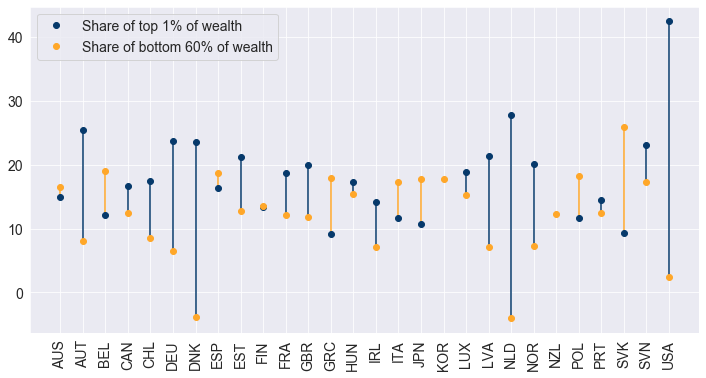

In [26]:
countries = sorted(list(set(top_1pct_wealth.COUNTRY.tolist()+btm_60pct_wealth.COUNTRY.tolist())))
xValues1, xValues2, colors = [], [], []
lines = []
for i in range(len(countries)):
    try:
        idx1 = top_1pct_wealth.COUNTRY[top_1pct_wealth.COUNTRY == countries[i]].index[0]
    except:
        idx1 = -1
    try:
        idx2 = btm_60pct_wealth.COUNTRY[btm_60pct_wealth.COUNTRY == countries[i]].index[0]
    except:
        idx2 = -1
        
    if idx1 != -1 and idx2 != -1:
        xValues1.append(top_1pct_wealth.Value[idx1])
        xValues2.append(btm_60pct_wealth.Value[idx2])
        pair = [(i, top_1pct_wealth.Value[idx1]), (i, btm_60pct_wealth.Value[idx2])]
        if top_1pct_wealth.Value[idx1] < btm_60pct_wealth.Value[idx2]:
            colors.append('#ffa729')
        else:
            colors.append('#06396b')
        lines.append(pair)
    elif idx1 != -1:
        xValues1.append(top_1pct_wealth.Value[idx1])
        xValues2.append(np.nan)
    elif idx2 != -1:
        xValues1.append(np.nan)
        xValues2.append(btm_60pct_wealth.Value[idx2])


lineColl = matcoll.LineCollection(lines, colors=colors)

fig, ax = plt.subplots(figsize=(12, 6))
ax.add_collection(lineColl)
plt.plot(countries, xValues1, linestyle='None', marker='o', color='#06396b', label='Share of top 1% of wealth')
plt.plot(countries, xValues2, linestyle='None', marker='o', color='#ffa729', label='Share of bottom 60% of wealth')
plt.xticks(rotation=90)
plt.legend()

### Gini

In [27]:
gini = pd.read_csv('../OECD/IDD_DI.csv')

/Users/junaluzi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
iso3 = {
'AUT': 'adv', 'BEL': 'adv','BGR': 'ADV', 'CAN': 'adv', 'CHE': 'adv', 'CHL': 'emea', 'CRI': 'emea',
'CZE': 'adv', 'DEU': 'adv', 'DNK': 'adv', 'ESP': 'adv', 'EST': 'adv', 'FIN': 'adv', 'FRA': 'adv',
'GBR': 'adv', 'GRC': 'adv', 'HUN': 'adv', 'IRL': 'adv', 'ISL': 'adv', 'ISR': 'adv', 'ITA': 'adv',
'JPN': 'adv', 'KOR': 'adv', 'LTU': 'adv', 'LUX': 'adv', 'LVA': 'adv', 'NLD': 'adv', 'NOR': 'adv',
'POL': 'emea', 'PRT': 'adv', 'ROU': 'emea', 'SVK': 'adv', 'SVN': 'adv', 'SWE': 'adv', 'TUR': 'emea',
'USA': 'adv', 'ZAF': 'emea'}

In [29]:
def clean_gini(df, type_):
    df = df[(df.MEASURE == type_) & (df.AGE == 'TOT') & (df.METHODO == 'METH2012')]
    df = df[['LOCATION', 'Value', 'Year']]
    df = df.pivot(index='LOCATION', columns='Year', values='Value')
    return df

In [30]:
year = 2015
di_gini = clean_gini(gini, 'GINI')
mi_gini = clean_gini(gini, 'GINIB')
concat_gini = pd.concat([mi_gini[year], di_gini[year]], axis=1)
concat_gini.columns = ['mi', 'di']
concat_gini = concat_gini.reset_index()
concat_gini = concat_gini.dropna(thresh=2)
concat_gini['iso3'] = concat_gini.LOCATION.map(lambda x: iso3[x])

500

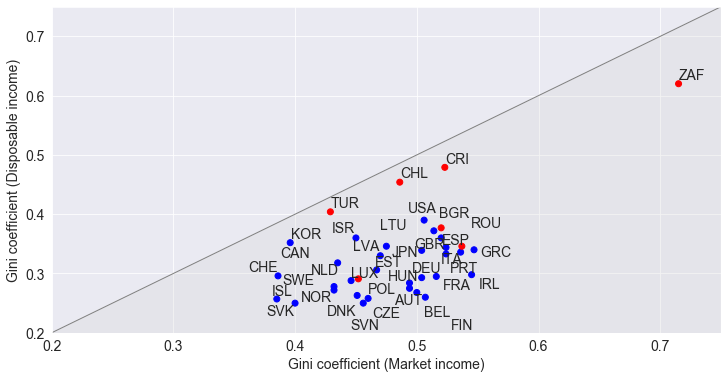

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
x, y = 0.2, 0.75
colors = ['b' if x == 'adv' else 'r' for x in concat_gini.iso3]
plt.plot([x, y], [x, y], linewidth=1, color='grey')
plt.fill_between([x, y], [x, y], alpha=0.25, facecolor='lightgrey')
plt.ylim(x, y)
plt.xlim(x, y)
plt.xlabel('Gini coefficient (Market income)')
plt.ylabel('Gini coefficient (Disposable income)')
plt.scatter(concat_gini.mi,concat_gini.di, c=colors)
texts = []
for x, y, txt in zip(concat_gini.mi, concat_gini.di, concat_gini.LOCATION):
    texts.append(ax.text(x, y, txt))
adjust_text(texts, force_text=0.1)